<a href="https://colab.research.google.com/github/SakshiSanjayNagare/Capston-Project/blob/main/app_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
df = pd.read_csv('/content/CAR DETAILS.csv')
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [ ]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [ ]:
df.duplicated().sum()

763

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['owner'].fillna('Unknown',inplace=True)
df['owner']=df['owner'].astype(str)
le = LabelEncoder()
for col in ['fuel','seller_type','transmission','owner']:
  df[col] = le.fit_transform(df[col])
  print("Categorical encoding completed successfully!")



Categorical encoding completed successfully!
Categorical encoding completed successfully!
Categorical encoding completed successfully!
Categorical encoding completed successfully!


<ipython-input-7-38ef450a78f8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owner'].fillna('Unknown',inplace=True)


In [ ]:
scaler = StandardScaler()
df[['selling_price', 'km_driven', 'year']] = scaler.fit_transform(df[['selling_price', 'km_driven', 'year']])

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3577 non-null   object 
 1   year           3577 non-null   float64
 2   selling_price  3577 non-null   float64
 3   km_driven      3577 non-null   float64
 4   fuel           3577 non-null   int64  
 5   seller_type    3577 non-null   int64  
 6   transmission   3577 non-null   int64  
 7   owner          3577 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 251.5+ KB
None
                       name      year  selling_price  km_driven  fuel  \
0             Maruti 800 AC -1.402566      -0.812819   0.015754     4   
1  Maruti Wagon R LXI Minor -1.402566      -0.665538  -0.404650     4   
2      Hyundai Verna 1.6 SX -0.226418       0.247604   0.646360     1   
3    Datsun RediGO T Option  0.949731      -0.439708  -0.488731     4   
4     Honda Amaze VX i-DT

In [ ]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'],drop_first=True)

In [ ]:
scaler = StandardScaler()
numeric_columns = ['selling_price', 'km_driven', 'year']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [ ]:
print("Dataset after preprocessing:")
print(df.head())

df.to_csv('cleaned_car_details.csv',index=False)

Dataset after preprocessing:
                       name      year  selling_price  km_driven  fuel_1  \
0             Maruti 800 AC -1.402566      -0.812819   0.015754   False   
1  Maruti Wagon R LXI Minor -1.402566      -0.665538  -0.404650   False   
2      Hyundai Verna 1.6 SX -0.226418       0.247604   0.646360    True   
3    Datsun RediGO T Option  0.949731      -0.439708  -0.488731   False   
4     Honda Amaze VX i-DTEC  0.244042      -0.046958   1.508188    True   

   fuel_2  fuel_3  fuel_4  seller_type_1  seller_type_2  transmission_1  \
0   False   False    True           True          False            True   
1   False   False    True           True          False            True   
2   False   False   False           True          False            True   
3   False   False    True           True          False            True   
4   False   False   False           True          False            True   

   owner_1  owner_2  owner_3  owner_4  
0    False    False    False 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming CAR_DETAILS dataset is already loaded into df
# Example: df = pd.read_csv('CAR_DETAILS.csv')

# Define the mapping of one-hot encoded columns to fuel type names
fuel_mapping = {
    'fuel_1': 'Petrol',
    'fuel_2': 'Diesel',
    'fuel_3': 'CNG',
    'fuel_4': 'Electric'  # Adjust as per your dataset's fuel types
}

# List of one-hot encoded fuel columns
fuel_columns = ['fuel_1', 'fuel_2', 'fuel_3', 'fuel_4']

# Combine one-hot encoded columns into a single 'fuel' column
df['fuel'] = df[fuel_columns].idxmax(axis=1)  # Get the column with the max value (1)
df['fuel'] = df['fuel'].map(fuel_mapping)  # Map the column name to actual fuel type

# Drop rows where no valid fuel type is found (if any)
df = df[df['fuel'].notna()]

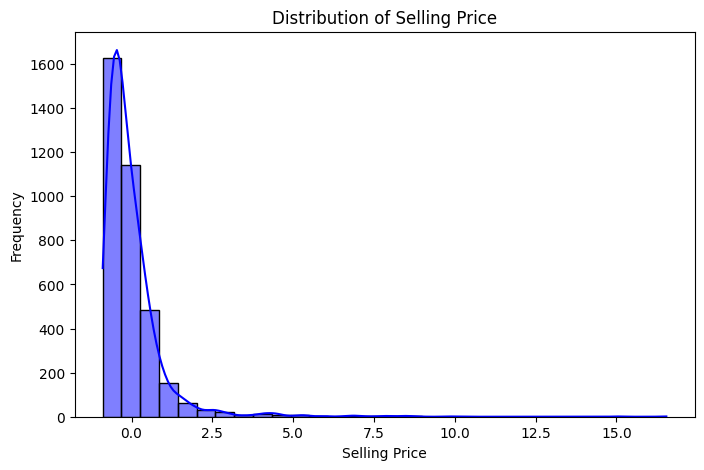

In [ ]:
# Distribution of Selling Price
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-1440b073d94c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=df, palette='Set2')


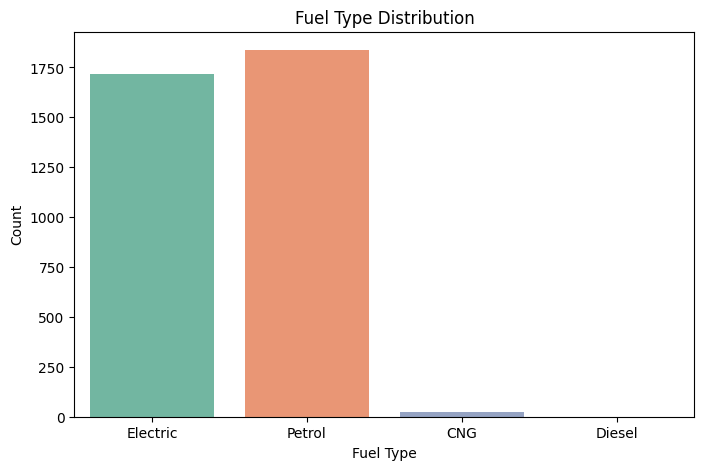

In [ ]:
# Plot the count plot for fuel types
plt.figure(figsize=(8, 5))
sns.countplot(x='fuel', data=df, palette='Set2')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

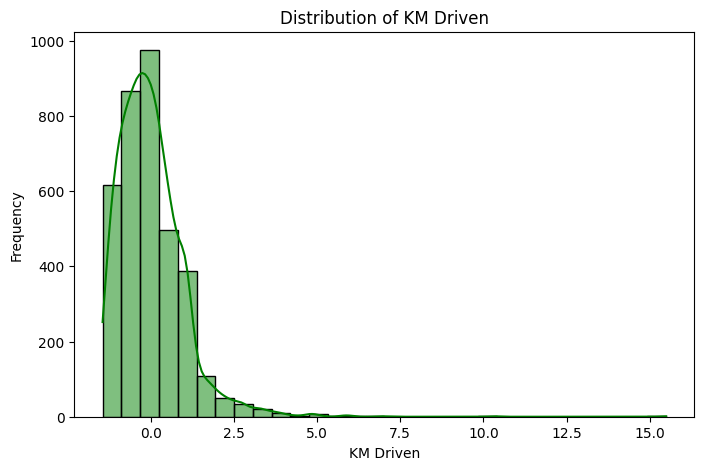

In [ ]:
#  Distribution of KM Driven
plt.figure(figsize=(8, 5))
sns.histplot(df['km_driven'], kde=True, color='green', bins=30)
plt.title('Distribution of KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-2337e6110d9a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='selling_price', data=df, palette='coolwarm')


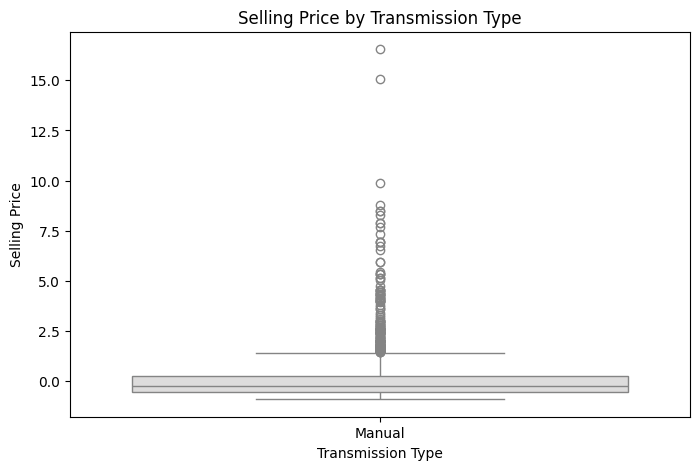

In [ ]:
transmission_mapping = {
    'transmission_1': 'Manual'
}

# List of one-hot encoded transmission columns
transmission_columns = ['transmission_1']

# Combine one-hot encoded columns into a single 'transmission' column
df['transmission'] = df[transmission_columns].idxmax(axis=1)  # Get the column with the max value (1)
df['transmission'] = df['transmission'].map(transmission_mapping)  # Map the column name to actual transmission type

# Drop rows where no valid transmission type is found (if any)
df = df[df['transmission'].notna()]

# Plot the box plot for selling price by transmission type
plt.figure(figsize=(8, 5))
sns.boxplot(x='transmission', y='selling_price', data=df, palette='coolwarm')
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

<ipython-input-18-443ab68087cd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seller_type', y='selling_price', data=df, palette='pastel')


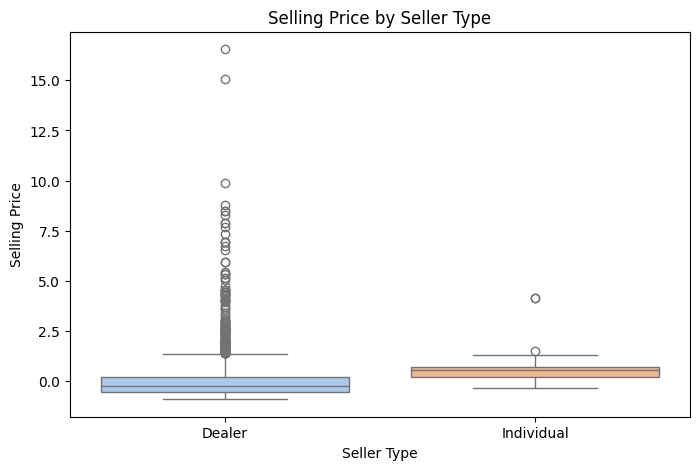

In [ ]:
#Define the mapping of one-hot encoded columns to seller types
seller_type_mapping = {
    'seller_type_1': 'Dealer',
    'seller_type_2': 'Individual'  # Adjust if there are additional types
}

# List of one-hot encoded seller type columns
seller_type_columns = ['seller_type_1', 'seller_type_2']

# Combine one-hot encoded columns into a single 'seller_type' column
df['seller_type'] = df[seller_type_columns].idxmax(axis=1)  # Get the column with the max value (1)
df['seller_type'] = df['seller_type'].map(seller_type_mapping)  # Map the column name to actual seller type

# Drop rows where no valid seller type is found (if any)
df = df[df['seller_type'].notna()]

# Plot the box plot for selling price by seller type
plt.figure(figsize=(8, 5))
sns.boxplot(x='seller_type', y='selling_price', data=df, palette='pastel')
plt.title('Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

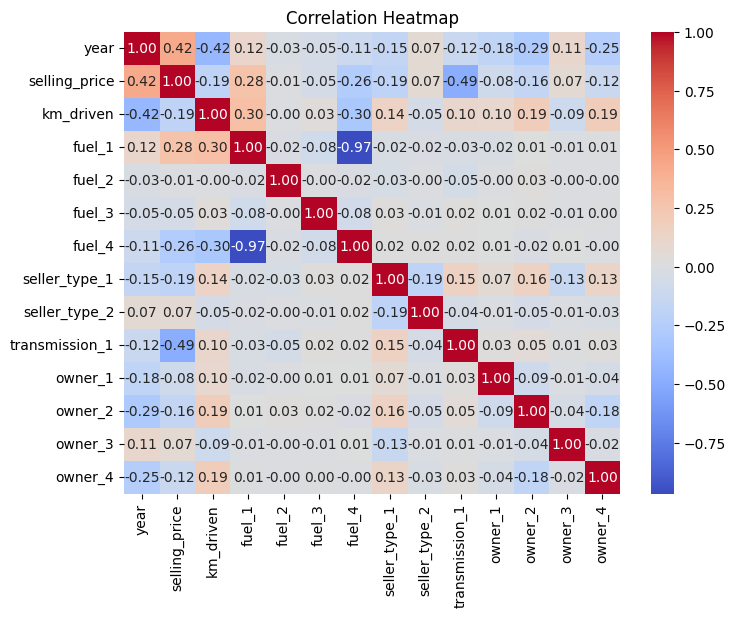

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Step 1: Handle missing values
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Check if there are any object type columns before assigning to categorical_cols
categorical_cols = df.select_dtypes(include=['object']).columns if df.select_dtypes(include=['object']).shape[1] > 0 else []

#uter.fit_transform(df[categorical_cols])
# Step 2: Handle outliers (example: remove rows with extremely high prices) Impute missing values only if there are categorical columns
# Impute missing values only if there are categorical columns
if not categorical_cols.empty:
    numerical_imputer = SimpleImputer(strategy='mean')  # For numerical columns
    categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
# Assuming 'price' is a column in the dataset
if 'price' in df.columns:
    q1 = df['price'].quantile(0.25)
    q3 = df['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Step 3: Encode categorical variables
# One-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                          columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add encoded ones
df = df.drop(columns=categorical_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# Step 4: Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 5: Split the data
# Assuming 'target' is the column to predict
X = df.drop(columns=['selling_price'])  # Replace 'target' with your actual target column
y = df['selling_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets
print("\nDataset Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Save processed data (optional)
X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
y_train.to_csv('y_train_processed.csv', index=False)
y_test.to_csv('y_test_processed.csv', index=False)

print("\nData preprocessing completed and files saved.")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3577 non-null   object 
 1   year            3577 non-null   float64
 2   selling_price   3577 non-null   float64
 3   km_driven       3577 non-null   float64
 4   fuel_1          3577 non-null   bool   
 5   fuel_2          3577 non-null   bool   
 6   fuel_3          3577 non-null   bool   
 7   fuel_4          3577 non-null   bool   
 8   seller_type_1   3577 non-null   bool   
 9   seller_type_2   3577 non-null   bool   
 10  transmission_1  3577 non-null   bool   
 11  owner_1         3577 non-null   bool   
 12  owner_2         3577 non-null   bool   
 13  owner_3         3577 non-null   bool   
 14  owner_4         3577 non-null   bool   
 15  fuel            3577 non-null   object 
 16  transmission    3577 non-null   object 
 17  seller_type     3577

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR

# Load preprocessed data
# Replace with actual preprocessed dataset file paths
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')
y_train = pd.read_csv('y_train_processed.csv').values.ravel()
y_test = pd.read_csv('y_test_processed.csv').values.ravel()

# Determine if the problem is classification or regression
is_classification = len(np.unique(y_train)) <= 10  # Example heuristic

print(f"Problem Type: {'Classification' if is_classification else 'Regression'}")

# Define models for classification and regression
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000) if is_classification else LinearRegression(),
    "Decision Tree": DecisionTreeClassifier() if is_classification else DecisionTreeRegressor(),
    "Random Forest": RandomForestClassifier() if is_classification else RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingClassifier() if is_classification else GradientBoostingRegressor(),
    "Bagging": BaggingClassifier() if is_classification else BaggingRegressor(),
    "SVM": SVC() if is_classification else SVR(),
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    if is_classification:
        accuracy = accuracy_score(y_test, predictions)
        return accuracy
    else:
        mse = mean_squared_error(y_test, predictions)
        return mse

# Apply models and find the best one
results = {}
for name, model in models.items():
    try:
        print(f"Training {name}...")
        score = evaluate_model(model, X_train, X_test, y_train, y_test)
        results[name] = score
        print(f"{name} Score: {score:.4f}")
    except Exception as e:
        print(f"{name} failed: {e}")

# Find the best model
if is_classification:
    best_model = max(results, key=results.get)
    print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")
else:
    best_model = min(results, key=results.get)
    print(f"\nBest Model: {best_model} with MSE: {results[best_model]:.4f}")

Problem Type: Regression
Training Logistic Regression...
Logistic Regression Score: 131469855591730293768192.0000
Training Decision Tree...
Decision Tree Score: 0.6934
Training Random Forest...
Random Forest Score: 0.5768
Training Gradient Boosting...
Gradient Boosting Score: 0.6003
Training Bagging...
Bagging Score: 0.6104
Training SVM...
SVM Score: 0.6225

Best Model: Random Forest with MSE: 0.5768


In [ ]:
import joblib
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Example Dataset
# Replace with actual preprocessed dataset file paths
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')
y_train = pd.read_csv('y_train_processed.csv').values.ravel()
y_test = pd.read_csv('y_test_processed.csv').values.ravel()

# Detect Problem Type (Classification or Regression)
is_classification = len(np.unique(y_train)) <= 10

# Define models
if is_classification:
    model = RandomForestClassifier(random_state=42)
else:
    model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
if is_classification:
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model Accuracy: {accuracy:.4f}")
else:
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Model MSE: {mse:.4f}")

# Save the best model
model_filename = 'best_model.joblib'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

# Load the saved model
loaded_model = joblib.load(model_filename)

# Validate the loaded model
if is_classification:
    loaded_predictions = loaded_model.predict(X_test)
    loaded_accuracy = accuracy_score(y_test, loaded_predictions)
    print(f"Loaded Model Accuracy: {loaded_accuracy:.4f}")
else:
    loaded_predictions = loaded_model.predict(X_test)
    loaded_mse = mean_squared_error(y_test, loaded_predictions)
    print(f"Loaded Model MSE: {loaded_mse:.4f}")

Model MSE: 0.5972
Model saved as best_model.joblib
Loaded Model MSE: 0.5972


In [ ]:
import joblib

# Load the original CAR DETAILS dataset
original_data = pd.read_csv('/content/CAR DETAILS.csv')

# Randomly sample 20 data points from the dataset
sampled_data = original_data.sample(n=20, random_state=42)

# Load the saved model
model = joblib.load('best_model.joblib')

# --- Get the original training data's categorical columns ---
# Assuming you saved X_train to a CSV during training
X_train = pd.read_csv('X_train_processed.csv')
original_categorical_cols = [col for col in X_train.columns if col not in original_data.select_dtypes(include=['int64', 'float64']).columns]


# --- Preprocess the sampled data using the original training data's features ---
# 1. Numerical Features:
numerical_cols = sampled_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
numerical_data = scaler.fit_transform(sampled_data[numerical_cols])

# 2. Categorical Features:
categorical_cols = sampled_data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the original categorical columns from the training data
encoder.fit(original_data[categorical_cols])  # Fit using original data

# Transform the sampled data's categorical features using the fitted encoder
categorical_data = encoder.transform(sampled_data[categorical_cols])

# Get feature names from the encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame for the encoded categorical data with correct column names
encoded_df = pd.DataFrame(categorical_data, columns=encoded_feature_names, index=sampled_data.index)

# Combine numerical and categorical data
# Ensure all columns from the training data are present
all_cols = X_train.columns  # Get all columns from X_train
processed_data = pd.concat([pd.DataFrame(numerical_data, columns=numerical_cols, index=sampled_data.index), encoded_df], axis=1)
processed_data = processed_data.reindex(columns=all_cols, fill_value=0) # Add missing columns and fill with 0

# Make predictions
predictions = model.predict(processed_data)

# Display results
print("Original Sampled Dataset:")
print(sampled_data)

print("\nPredictions from the Saved Model:")
print(predictions)

Original Sampled Dataset:
                                            name  year  selling_price  \
3978             Tata Manza Aqua Quadrajet BS IV  2010         165000   
1448                       Renault KWID RXT BSIV  2019         250000   
2664                 Hyundai Santro Xing GL Plus  2008         120000   
17                         Honda Amaze VX i-DTEC  2014         450000   
1634                     Mahindra TUV 300 T8 AMT  2016         730000   
881                               Maruti Alto LX  2012         155000   
134    Ford Figo Aspire 1.2 Ti-VCT Titanium Plus  2015         530000   
2338                         Maruti Alto 800 LXI  2013          92800   
1992                      Maruti Swift Dzire VDI  2016         284000   
2886             Ford Figo 1.2P Titanium Plus MT  2012         260000   
3827                  Maruti Baleno Delta Diesel  2015         511000   
2704                  Toyota Fortuner 4x2 Manual  2014        1800000   
1056  Mahindra Bolero Pow